In [27]:
path_ball = r"G:\target_strength\2020_06_12_TS_ball_1m\*.wav"
# filename = r"\S4A02746_20000104_124448.wav"
# file = path + filename
from glob import glob 

In [28]:
path_tank = r"G:\target_strength\2020_05_22_TS\*.wav"

In [29]:
filelist_ball = glob(path_ball)

In [30]:
filelist_tank = glob(path_tank)

In [5]:
# from scipy.io import wavfile (do not support 24bits depth)
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib notebook

In [80]:
class SL():
    def __init__(self, file):
        self.file = file
        self.bits = 24
        self.range = 2
        title = self.file.split('\\')[-1].split('.')[0].split('_')
        self.plot_title = title[1] + "_" + title[2]
        self.freq = title[2]
        print("title: {}".format(self.plot_title))
    def readWavFileToArray(self):
#         fp = open(self.file, 'r')
#         self.fs, self.values = wavfile.read(self.file)
#         self.values = self.values*(self.range/pow(2,self.bits))
        self.values, self.fs = sf.read(self.file)
        self.length = len(self.values)
        self.time = np.arange(self.length)/self.fs
        print("total lenght: {}, time duration: {}".
              format(self.length, self.length//self.fs))
    def plot(self):
        plt.plot(self.time, self.values)
        plt.title(self.plot_title)
    def findPeakIndex(self, threshold):
        mask = ((self.values[1:-1]-self.values[2:])>0)*((self.values[1:-1]-self.values[:-2])>0)*(self.values[1:-1]>threshold)
        self.indexs = []
        for index, i in enumerate(mask):
            if(i):
                self.indexs.append(index+1)
        count=1
        self.indexs = np.array(self.indexs)
        diff = self.indexs[1:]-self.indexs[:-1]
        
        start_skip=2
        end_skip=1
        self.category=[]
        self.category.append(self.indexs[start_skip])
        for index, value in enumerate(diff):
            if value>self.fs:
                count+=1
                self.category.append(self.indexs[index-end_skip])
                self.category.append(self.indexs[index+1+start_skip])
        self.category.append(self.indexs[-(1+end_skip)])
        print("total sound generated: {}".format(count))
    def plotWithPeak(self):
        fig, ax = plt.subplots()
        ax.plot(self.time, self.values)
        ax.plot(self.time[self.indexs], self.values[self.indexs], 'o')
        ax.set_title(self.plot_title)
        fig.tight_layout()
    def plotWithFilterPeak(self):
        fig, ax = plt.subplots()
        ax.plot(self.time, self.values)
        ax.plot(self.time[self.category], self.values[self.category], 'o')
        ax.set_title(self.plot_title)
        fig.tight_layout()
    
    def rms(self, x):
        return np.sqrt(np.mean(x*x))
    def calculateSL(self):
        self.sen = -207
        length = len(self.category)
        print()
        if (length%2==0 and length>0):
            self.SL=[]
            for i in range(length//2):
                start = self.category[2*i]
                end = self.category[2*i+1]
                v = self.rms(self.values[start:end])
                sl = 20*math.log10(v)-self.sen
                self.SL.append(sl)
        else:
            print("the peak is wrong or empty, check the plot with peak")
    def getSL(self):
        return self.SL
    def getData(self):
        return self.values
    def getIndex(self):
        return self.indexs
    def getTime(self):
        return self.time

In [42]:
filelist_ball

['G:\\target_strength\\2020_06_12_TS_ball_1m\\1806_AI0_3k.wav',
 'G:\\target_strength\\2020_06_12_TS_ball_1m\\1810_AI0_4k.wav',
 'G:\\target_strength\\2020_06_12_TS_ball_1m\\1813_AI0_5k.wav',
 'G:\\target_strength\\2020_06_12_TS_ball_1m\\1815_AI0_6k.wav',
 'G:\\target_strength\\2020_06_12_TS_ball_1m\\1818_AI0_7k.wav',
 'G:\\target_strength\\2020_06_12_TS_ball_1m\\1820_AI0_8k.wav',
 'G:\\target_strength\\2020_06_12_TS_ball_1m\\1822_AI0_9k.wav',
 'G:\\target_strength\\2020_06_12_TS_ball_1m\\1824_AI0_10k.wav']

In [43]:
filelist_tank

['G:\\target_strength\\2020_05_22_TS\\1723_AI0_10k.wav',
 'G:\\target_strength\\2020_05_22_TS\\1723_AI1_10k.wav',
 'G:\\target_strength\\2020_05_22_TS\\1726_AI0_9k.wav',
 'G:\\target_strength\\2020_05_22_TS\\1726_AI1_9k.wav',
 'G:\\target_strength\\2020_05_22_TS\\1729_AI0_8k.wav',
 'G:\\target_strength\\2020_05_22_TS\\1729_AI1_8k.wav',
 'G:\\target_strength\\2020_05_22_TS\\1732_AI0_7k.wav',
 'G:\\target_strength\\2020_05_22_TS\\1732_AI1_7k.wav',
 'G:\\target_strength\\2020_05_22_TS\\1734_AI0_6k.wav',
 'G:\\target_strength\\2020_05_22_TS\\1734_AI1_6k.wav',
 'G:\\target_strength\\2020_05_22_TS\\1737_AI0_5k.wav',
 'G:\\target_strength\\2020_05_22_TS\\1737_AI1_5k.wav',
 'G:\\target_strength\\2020_05_22_TS\\1745_AI0_4k.wav',
 'G:\\target_strength\\2020_05_22_TS\\1745_AI1_4k.wav',
 'G:\\target_strength\\2020_05_22_TS\\1748_AI0_3k.wav',
 'G:\\target_strength\\2020_05_22_TS\\1748_AI1_3k.wav']

title: AI0_3k
total lenght: 13650000, time duration: 133


<IPython.core.display.Javascript object>


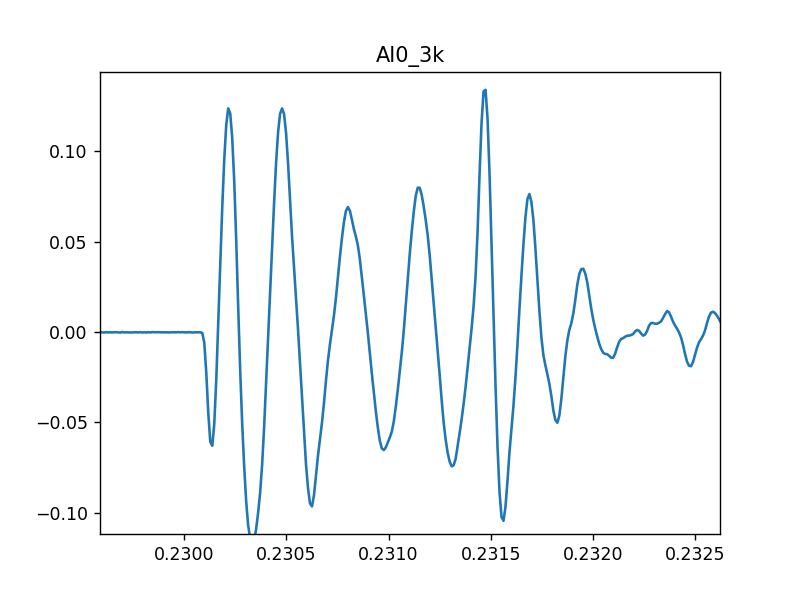

In [93]:
ball = SL(filelist_ball[0])
ball.readWavFileToArray()
ball.plot()

In [45]:
tank = SL(filelist_tank[10])
tank.readWavFileToArray()
tank.plot()

title: AI0_5k
total lenght: 23450000, time duration: 229


total sound generated: 24


<IPython.core.display.Javascript object>


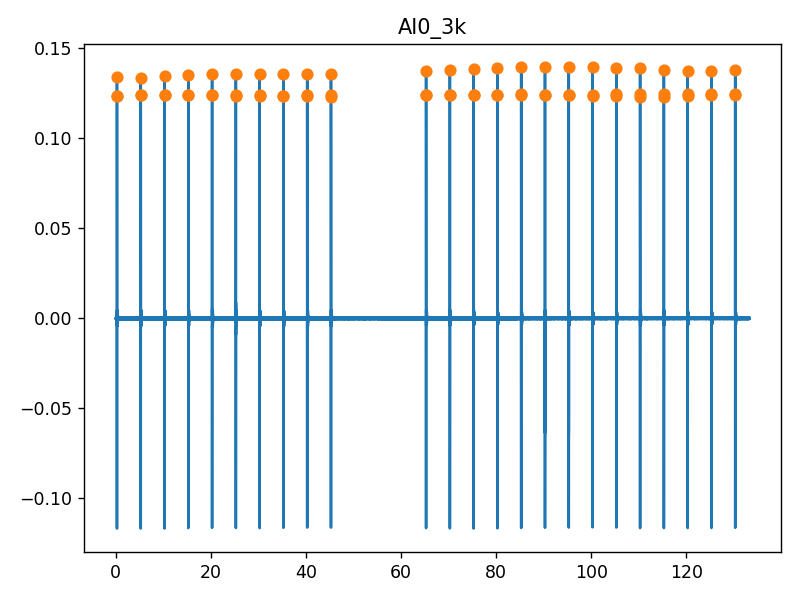

In [82]:
ball.findPeakIndex(0.1)
ball.plotWithPeak()
# b.calculateSL()

total sound generated: 45


<IPython.core.display.Javascript object>


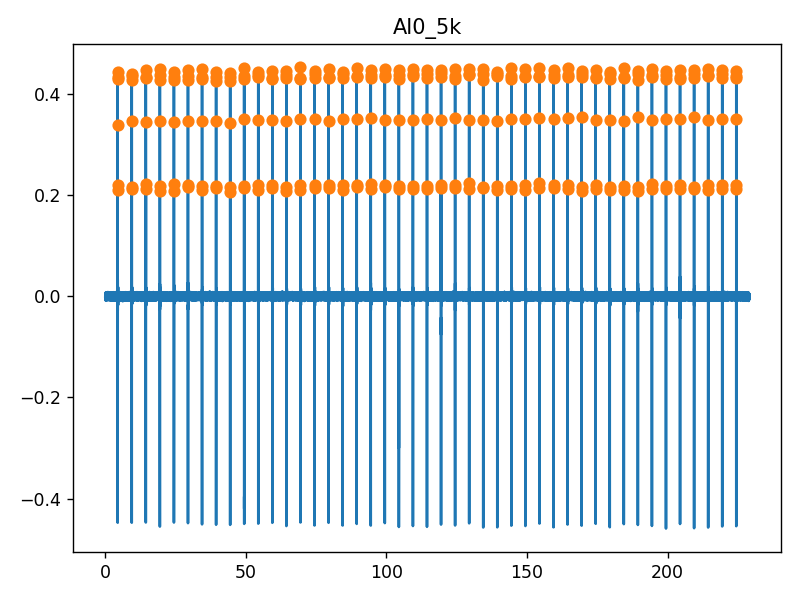

In [47]:
tank.findPeakIndex(0.2)
tank.plotWithPeak()
# a.calculateSL()

In [56]:
index_tank = tank.getIndex()
len(index_tank)/6

45.0

In [83]:
index_ball = ball.getIndex()
len(index_ball)/24

3.0

In [84]:
data_ball = ball.getData()
# data_tank = tank.getData()

In [90]:
fs = 102400
f = 3000
start_ball = int(index_ball[0]-0.001*fs)
end_ball = int(start_ball + fs*0.0025)
# start_tank = int(index_tank[0]-0.001*fs)
# end_tank = int(start_tank + fs*0.004)

add_ball = data_ball[start_ball:end_ball]
# add_tank = data_tank[start_tank:end_tank]
for i in range(1, 24):
    start_ball = int(index_ball[3*i]-0.001*fs)
    end_ball = int(start_ball + fs*0.0025)
#     start_tank = int(index_tank[6*i]-0.001*fs)
#     end_tank = int(start_tank + fs*0.004)
    
    ball = data_ball[start_ball:end_ball]
#     tank = data_tank[start_tank:end_tank]
    
    add_ball = add_ball + ball
#     add_tank = add_tank + tank

<IPython.core.display.Javascript object>


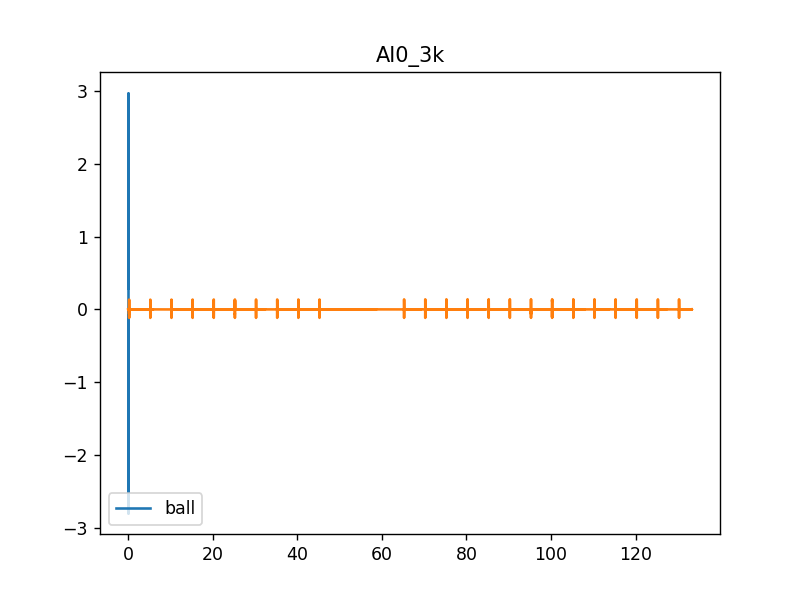

In [91]:
fig, ax = plt.subplots()
fs = 102400
time = np.arange(len(add_ball))/fs

ax.plot(time, add_ball, label="ball")
# ax.plot(time, add_tank, label="tank")
# ax[1].plot(time_tank[time_tank_start:end_tank], data_head[time_head_start:end_head]-data_tank[time_tank_start:end_tank], label="head-tank")
ax.legend(loc=3)
# fig.tight_layout()

In [63]:
fs = 102400
f = 5000
start_ball = int(index_ball[0]-0.001*fs)
end_ball = int(start_ball + fs*0.004)
start_tank = int(index_tank[0]-0.001*fs)
end_tank = int(start_tank + fs*0.004)

add_ball = data_ball[start_ball:end_ball]
add_tank = data_tank[start_tank:end_tank]
# for i in range(1, 20):
#     start_ball = int(index_ball[6*i]-0.001*fs)
#     end_ball = int(start_ball + fs*0.004)
#     start_tank = int(index_tank[6*i]-0.001*fs)
#     end_tank = int(start_tank + fs*0.004)
    
#     ball = data_ball[start_ball:end_ball]
#     tank = data_tank[start_tank:end_tank]
    
#     add_ball = add_ball + ball
#     add_tank = add_tank + tank

<IPython.core.display.Javascript object>


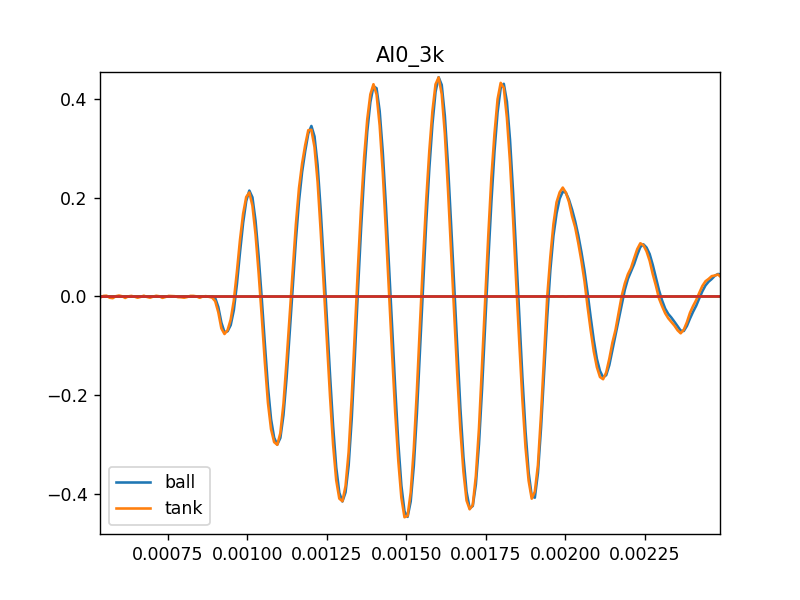

In [64]:
fig, ax = plt.subplots()
fs = 102400
time = np.arange(len(add_ball))/fs

ax.plot(time, add_ball, label="ball")
ax.plot(time, add_tank, label="tank")
# ax[1].plot(time_tank[time_tank_start:end_tank], data_head[time_head_start:end_head]-data_tank[time_tank_start:end_tank], label="head-tank")
ax.legend(loc=3)
# fig.tight_layout()

In [48]:
type(add)

numpy.ndarray

In [55]:
max(add)

8.880887746810913

In [61]:
import math
sen=-207
source_pa = add/20/math.pow(10,sen/20)*(10**-6)

<IPython.core.display.Javascript object>


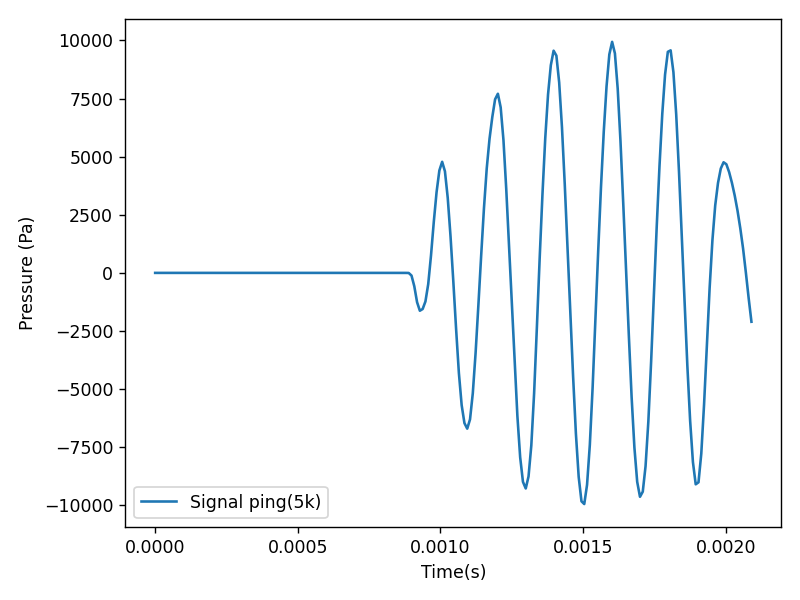

In [80]:
fig, ax = plt.subplots()
fs = 102400
time = np.arange(len(add))/fs

ax.plot(time, source_pa, label="Signal ping(5k)")
ax.set_ylabel("Pressure (Pa)")
ax.set_xlabel("Time(s)")
# ax[1].plot(time_tank[time_tank_start:end_tank], data_head[time_head_start:end_head]-data_tank[time_tank_start:end_tank], label="head-tank")
ax.legend(loc=3)
fig.tight_layout()

In [63]:
np.savetxt("source_5k.txt", source_pa)

In [66]:
source_pa.shape

(215,)

In [67]:
np.savetxt("time_5k.txt", time)
time.shape

(215,)

In [76]:
source_data = np.stack((time, source_pa), axis=1)
source_data.shape

(215, 2)